<a href="https://colab.research.google.com/github/Chandrani-030/Data-analysis-Project/blob/main/02_exploratory_data_analysis_with_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

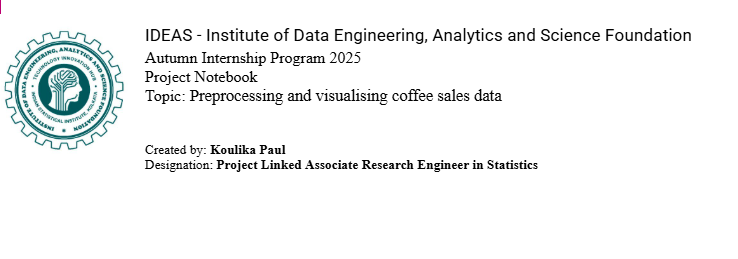

## **NAME: Chandrani Dutta**
## **SECTION: 1**
## **PROJECT NOTEBOOK: 02-exploratory-data-analysis-with-sales-data**

### **Study on given dataset**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
coffee_data=pd.read_csv("/content/drive/MyDrive/PROJECT/Coffee_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,01-03-2024,15:50.5
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,01-03-2024,19:22.5
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,01-03-2024,20:18.1
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,01-03-2024,46:33.0
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,01-03-2024,48:14.6
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,23-03-2025,34:54.9
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,23-03-2025,43:37.4
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,23-03-2025,44:16.9
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,23-03-2025,47:28.7


**Q1. Find the number of columns, duplicate columns, and missing values**

In [31]:
# Number of columns
num_columns = coffee_data.shape[1]
print(f"Number of columns: {num_columns}")

# Find duplicate columns
duplicate_columns = coffee_data.columns[coffee_data.columns.duplicated()].tolist()
print(f"Duplicate columns: {duplicate_columns if duplicate_columns else 'None'}")

# Find missing values
missing_values = coffee_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else 'No missing values')

Number of columns: 11
Duplicate columns: None
Missing values per column:
No missing values


***Basic statistics of the data***

In [32]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [33]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [34]:
# Convert 'Date' column to datetime, handling errors gracefully
coffee_data['Date'] = pd.to_datetime(coffee_data['Date'], format='%d-%m-%Y', errors='coerce')

# Check for any conversion issues
if coffee_data['Date'].isnull().any():
    print("Warning: Some dates could not be converted and are set as NaT.")

# Extract 'Month' and 'Year' only if 'Date' conversion was successful
coffee_data['Month'] = coffee_data['Date'].dt.month
coffee_data['Year'] = coffee_data['Date'].dt.year

***Average money for each year***

In [75]:
grouped_data= coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-2576012514.py:1: FutureWarning: The provided callable <function mean at 0x7e3eeaf709a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data= coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [36]:
# Example: Group data by 'Month' and check datatypes of the grouped object
grouped = coffee_data.groupby('Month')

# To see the dtypes of the grouped data, check the dtypes of the underlying DataFrame
print("Data types of grouped data:")
print(grouped.obj.dtypes)

Data types of grouped data:
hour_of_day             int64
cash_type              object
money                 float64
coffee_name            object
Time_of_Day            object
Weekday                object
Month_name             object
Weekdaysort             int64
Monthsort               int64
Date           datetime64[ns]
Time                   object
Month                   int32
Year                    int32
dtype: object


**Q3. Find the maximum money for each month**

In [37]:
# Find the maximum money for each month
max_money_per_month = coffee_data.groupby('Month')['money'].max()
print("Maximum money for each month:")
print(max_money_per_month)

Maximum money for each month:
Month
1     35.76
2     35.76
3     38.70
4     38.70
5     37.72
6     37.72
7     37.72
8     32.82
9     35.76
10    35.76
11    35.76
12    35.76
Name: money, dtype: float64


***Distribution of money over months***

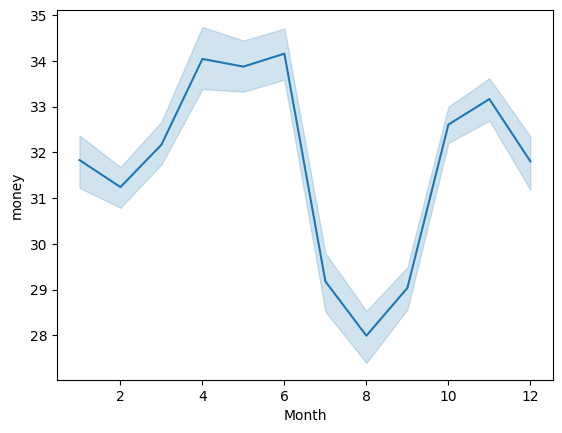

In [38]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

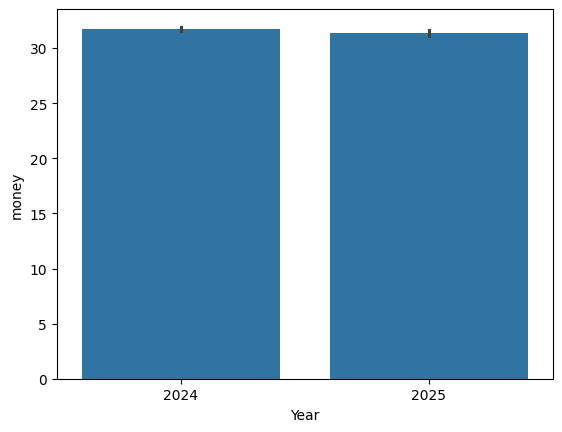

In [39]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


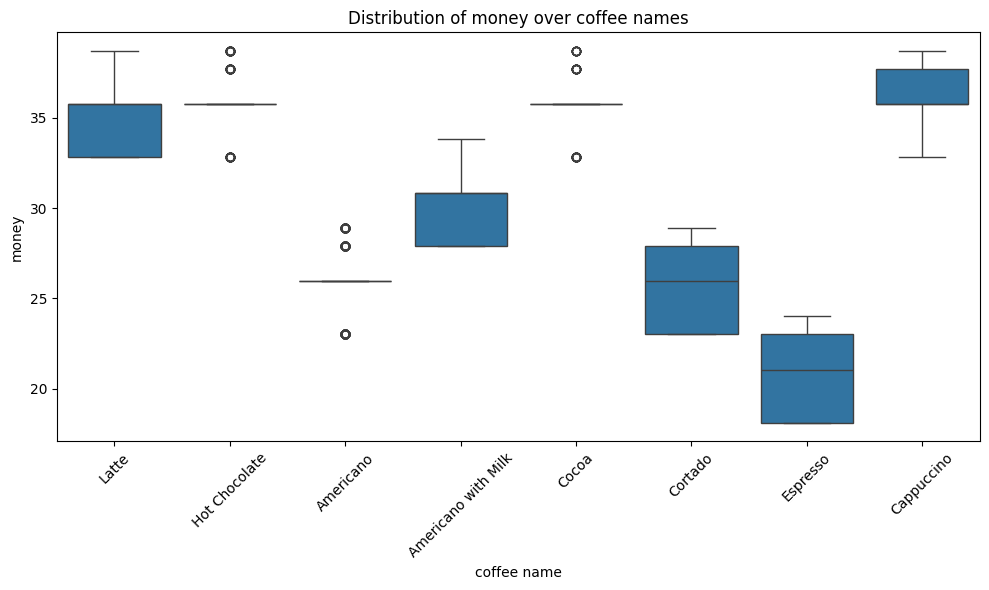

                     count       mean       std    min    25%    50%    75%  \
coffee_name                                                                   
Americano            564.0  25.975638  1.676099  23.02  25.96  25.96  25.96   
Americano with Milk  809.0  30.594710  1.883843  27.92  27.92  30.86  30.86   
Cappuccino           486.0  35.883004  1.819232  32.82  35.76  35.76  37.72   
Cocoa                239.0  35.653389  1.233693  32.82  35.76  35.76  35.76   
Cortado              287.0  25.731220  2.093669  23.02  23.02  25.96  27.92   
Espresso             129.0  20.854884  1.974016  18.12  18.12  21.06  23.02   
Hot Chocolate        276.0  35.990797  1.437499  32.82  35.76  35.76  35.76   
Latte                757.0  35.502378  1.821834  32.82  32.82  35.76  35.76   

                      max  
coffee_name                
Americano            28.9  
Americano with Milk  33.8  
Cappuccino           38.7  
Cocoa                38.7  
Cortado              28.9  
Espresso     

In [40]:
# Distribution of money over coffee names
plt.figure(figsize=(10,6))
sns.boxplot(x='coffee_name', y='money', data=coffee_data)
plt.title('Distribution of money over coffee names')
plt.xlabel('coffee name')
plt.ylabel('money')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# For a summary table as well:
money_distribution = coffee_data.groupby('coffee_name')['money'].describe()
print(money_distribution)

***Times of the Day the dataset holds***

In [41]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [42]:
# Find the number of unique coffee types in the dataset
num_coffee_types = coffee_data['coffee_name'].nunique()
print(f"Number of unique coffee types: {num_coffee_types}")

Number of unique coffee types: 8


***Max money from coffee_name***

In [43]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [44]:
# Calculate average money made at each time of day
avg_money_time = coffee_data.groupby('Time_of_Day')['money'].mean().sort_values(ascending=False)
print("Average money made at different times of the day:")
print(avg_money_time)

Average money made at different times of the day:
Time_of_Day
Night        32.890904
Afternoon    31.643187
Morning      30.422693
Name: money, dtype: float64


***Generate 100 synthetic data rows***

In [45]:
date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,-0.020902
1,2023-01-02,0.096426
2,2023-01-03,1.374091
3,2023-01-04,0.782519
4,2023-01-05,1.329617
...,...,...
95,2023-04-06,10.715524
96,2023-04-07,9.121097
97,2023-04-08,8.521722
98,2023-04-09,8.526965


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [46]:
# 1. Prepare synthetic data to match the structure of coffee_data

# We'll randomly assign values for the required columns
np.random.seed(42)  # For reproducibility
n_synth = len(df)

# Possible values for categorical columns
coffee_names = coffee_data['coffee_name'].unique()
cash_types = coffee_data['cash_type'].unique()
times_of_day = coffee_data['Time_of_Day'].unique()
weekdays = coffee_data['Weekday'].unique()
month_names = coffee_data['Month_name'].unique()

# Generate synthetic columns
synth = pd.DataFrame({
    'hour_of_day': np.random.randint(6, 20, size=n_synth),
    'cash_type': np.random.choice(cash_types, size=n_synth),
    'money': np.round(np.random.uniform(coffee_data['money'].min(), coffee_data['money'].max(), size=n_synth), 2),
    'coffee_name': np.random.choice(coffee_names, size=n_synth),
    'Time_of_Day': np.random.choice(times_of_day, size=n_synth),
    'Weekday': np.random.choice(weekdays, size=n_synth),
    'Month_name': df['date'].dt.strftime('%b'),
    'Weekdaysort': np.random.randint(1, 8, size=n_synth),
    'Monthsort': df['date'].dt.month,
    'Date': df['date'],
    'Time': np.nan,  # Synthetic, so leave as NaN or generate random times if needed
    'Month': df['date'].dt.month.astype(np.int32),
    'Year': df['date'].dt.year.astype(np.int32)
})

# 2. Concatenate synthetic data with the original data
coffee_data_augmented = pd.concat([coffee_data, synth], ignore_index=True)

# 3. Re-run basic analyses

# Number of columns
num_columns_aug = coffee_data_augmented.shape[1]
print(f"Number of columns: {num_columns_aug}")

# Duplicate columns
duplicate_columns_aug = coffee_data_augmented.columns[coffee_data_augmented.columns.duplicated()].tolist()
print(f"Duplicate columns: {duplicate_columns_aug if duplicate_columns_aug else 'None'}")

# Missing values
missing_values_aug = coffee_data_augmented.isnull().sum()
print("Missing values per column:")
print(missing_values_aug[missing_values_aug > 0] if missing_values_aug.sum() > 0 else 'No missing values')

# Basic statistics
print("\nBasic statistics:")
print(coffee_data_augmented.describe(include='all'))

# Average money for each year
avg_money_year_aug = coffee_data_augmented.groupby('Year')['money'].mean()
print("\nAverage money for each year:")
print(avg_money_year_aug)

# Maximum money for each month
max_money_month_aug = coffee_data_augmented.groupby('Month')['money'].max()
print("\nMaximum money for each month:")
print(max_money_month_aug)

# Distribution of money over coffee names
money_distribution_aug = coffee_data_augmented.groupby('coffee_name')['money'].describe()
print("\nMoney distribution by coffee name:")
print(money_distribution_aug)

# Number of unique coffee types
num_coffee_types_aug = coffee_data_augmented['coffee_name'].nunique()
print(f"\nNumber of unique coffee types: {num_coffee_types_aug}")

# Average money made at each time of day
avg_money_time_aug = coffee_data_augmented.groupby('Time_of_Day')['money'].mean().sort_values(ascending=False)
print("\nAverage money made at different times of the day:")
print(avg_money_time_aug)

Number of columns: 13
Duplicate columns: None
Missing values per column:
Time    100
dtype: int64

Basic statistics:
        hour_of_day cash_type        money          coffee_name Time_of_Day  \
count   3647.000000      3647  3647.000000                 3647        3647   
unique          NaN         1          NaN                    8           3   
top             NaN      card          NaN  Americano with Milk   Afternoon   
freq            NaN      3647          NaN                  825        1240   
mean      14.149986       NaN    31.540310                  NaN         NaN   
min        6.000000       NaN    18.120000                  NaN         NaN   
25%       10.000000       NaN    27.920000                  NaN         NaN   
50%       14.000000       NaN    32.820000                  NaN         NaN   
75%       18.000000       NaN    35.760000                  NaN         NaN   
max       22.000000       NaN    38.700000                  NaN         NaN   
std        4.2

### **Study on a new dataset**

#### **Reading the Dataset**

In [47]:
mobile_data = pd.read_csv('/content/drive/MyDrive/PROJECT/Mobile_Sales.csv')
mobile_data

,Date,Country,Distributor,Brand,Operator,Unit Cost,Amount,Unit Price,Sales,Year,Quarter,Month,Month Name,Month & Year,Week Day,Day Name,Week Number,Quarter (Q)
0,24-05-2018,Colombia,Metro,Apple,Tuenti,750,89,1200,106800,2018,2,5,May,May-18,4,Thu,21,Q2
1,31-05-2020,El Salvador,Saga Falabella,Apple,Tuenti,750,34,1200,40800,2020,2,5,May,May-20,7,Sun,22,Q2
2,30-08-2021,Switzerland,Metro,Apple,Tuenti,750,18,1200,21600,2021,3,8,Aug,Aug-21,1,Mon,36,Q3
3,03-08-2021,Mexico,Oeschle,Apple,Tuenti,750,129,1200,154800,2021,3,8,Aug,Aug-21,2,Tue,32,Q3
4,21-03-2018,Paraguay,Ripley,Apple,Tuenti,750,95,1200,114000,2018,1,3,Mar,Mar-18,3,Wed,12,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,23-08-2020,Germany,Tottus,Samsung,Movistar,590,44,820,36080,2020,3,8,Aug,Aug-20,7,Sun,34,Q3
2994,17-08-2018,Cuba,Saga Falabella,Samsung,Movistar,590,5,820,4100,2018,3,8,Aug,Aug-18,5,Fri,33,Q3
2995,13-12-2018,Denmark,Ripley,Samsung,Movistar,590,17,820,13940,2018,4,12,Dec,Dec-18,4,Thu,50,Q4
2996,09-12-2019,Germany,Ripley,Samsung,Movistar,590,7,820,5740,2019,4,12,Dec,Dec-19,1,Mon,50,Q4


#### **Data Quality Checks**

**Q1. Find the number of columns and rows**

In [48]:
# Number of columns
num_columns = mobile_data.shape[1]
print(f"Number of columns: {num_columns}")
# Number of rows
num_rows = mobile_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of columns: 18
Number of rows: 2998


**Q2. Find the number of duplicate columns and rows**

In [49]:
# Find duplicate columns
duplicate_columns = mobile_data.columns[mobile_data.columns.duplicated()].tolist()
print(f"Duplicate columns: {duplicate_columns if duplicate_columns else 'None'}")
# Find duplicate rows
duplicate_rows = mobile_data[mobile_data.duplicated()].copy()
print(f"Duplicate rows: {duplicate_rows if not duplicate_rows.empty else 'None'}")

Duplicate columns: None
Duplicate rows:             Date      Country     Distributor    Brand  Operator  Unit Cost  \
59    24-05-2018     Colombia           Metro    Apple    Tuenti        750   
60    31-05-2020  El Salvador  Saga Falabella    Apple    Tuenti        750   
61    30-08-2021  Switzerland           Metro    Apple    Tuenti        750   
62    03-08-2021       Mexico         Oeschle    Apple    Tuenti        750   
63    21-03-2018     Paraguay          Ripley    Apple    Tuenti        750   
...          ...          ...             ...      ...       ...        ...   
2993  23-08-2020      Germany          Tottus  Samsung  Movistar        590   
2994  17-08-2018         Cuba  Saga Falabella  Samsung  Movistar        590   
2995  13-12-2018      Denmark          Ripley  Samsung  Movistar        590   
2996  09-12-2019      Germany          Ripley  Samsung  Movistar        590   
2997  14-04-2020    Venezuela         Oeschle  Samsung  Movistar        590   

      Amoun

**Q3. Find the missing values**

In [50]:
# Find missing values
missing_values = mobile_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else 'No missing values')
print("Missing values per row:")
print(mobile_data.isnull().sum(axis=1)[mobile_data.isnull().sum(axis=1) > 0] if mobile_data.isnull().sum(axis=1).sum() > 0 else 'No missing values')

Missing values per column:
No missing values
Missing values per row:
No missing values


**Q4. Basic Statistics of the Data**

In [51]:
mobile_data.describe()

,Unit Cost,Amount,Unit Price,Sales,Year,Quarter,Month,Week Day,Week Number
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,541.534356,50.815210,830.126751,42429.886591,2019.766511,2.515010,6.569713,4.133422,27.070047
std,169.081053,52.102526,210.767344,46234.737273,1.169139,1.104609,3.423355,1.953636,14.998691
min,175.000000,1.000000,450.000000,450.000000,2018.000000,1.000000,1.000000,1.000000,1.000000
25%,550.000000,14.000000,800.000000,10862.500000,2019.000000,2.000000,4.000000,2.000000,14.000000
50%,590.000000,33.000000,820.000000,26000.000000,2020.000000,3.000000,7.000000,4.000000,27.000000
75%,675.000000,70.000000,950.000000,57000.000000,2021.000000,3.000000,9.000000,6.000000,40.000000
max,750.000000,295.000000,1200.000000,336000.000000,2021.000000,4.000000,12.000000,7.000000,53.000000


**Q5. Find the data types**

In [52]:
mobile_data.dtypes

,0
Date,object
Country,object
Distributor,object
Brand,object
Operator,object
Unit Cost,int64
Amount,int64
Unit Price,int64
Sales,int64
Year,int64


#### **Sales Analysis**

**Q6. Avarage sales for each year**

In [53]:
grouped_data=mobile_data.groupby('Year')['Sales'].agg(np.mean)
grouped_data

/tmp/ipython-input-934288965.py:1: FutureWarning: The provided callable <function mean at 0x7e3eeaf709a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=mobile_data.groupby('Year')['Sales'].agg(np.mean)


,Sales
Year,
2018,42438.794788
2019,45395.924765
2020,37691.482759
2021,43159.279588


**Q7. Maximum sales for each months**

In [54]:
# Maximum sales for each month
grouped_month = mobile_data.groupby('Month')['Sales'].max()
print(grouped_month)

Month
1     276000
2     268850
3     206400
4     241900
5     221350
6     206400
7     300000
8     259350
9     336000
10    224400
11    185900
12    179580
Name: Sales, dtype: int64


**Q8. Distribution of sales across months of the year**

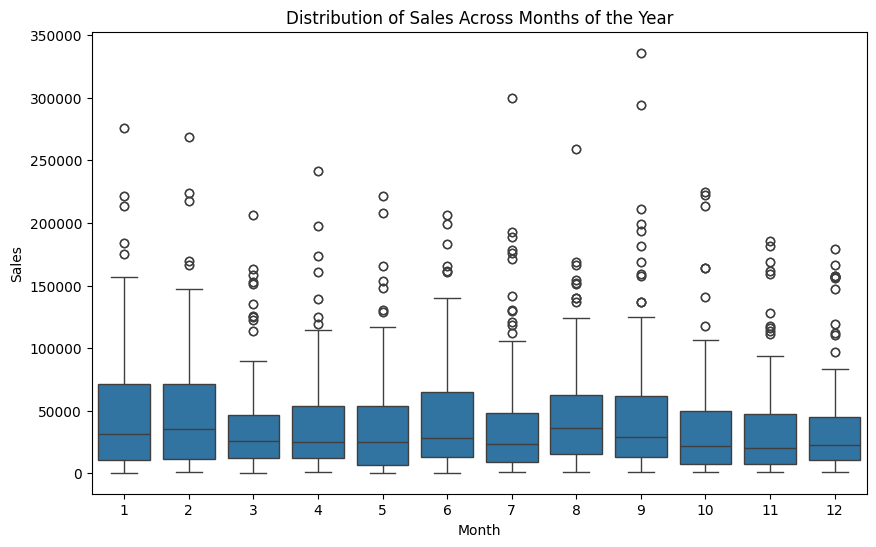

In [55]:
# Distribution of sales across months of the year
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='Sales', data=mobile_data)
plt.title('Distribution of Sales Across Months of the Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Q9. Distribution of sales over one year**

/tmp/ipython-input-1639541422.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Sales', data=mobile_data, estimator='sum', ci=None)


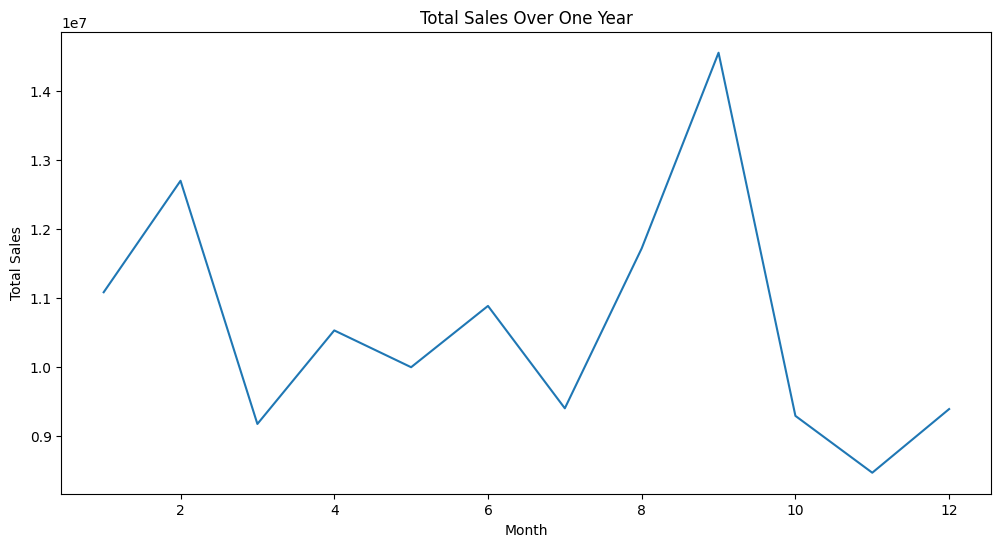

In [56]:
# Distribution of sales over one year
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=mobile_data, estimator='sum', ci=None)
plt.title('Total Sales Over One Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Q10. Density of sales across years**

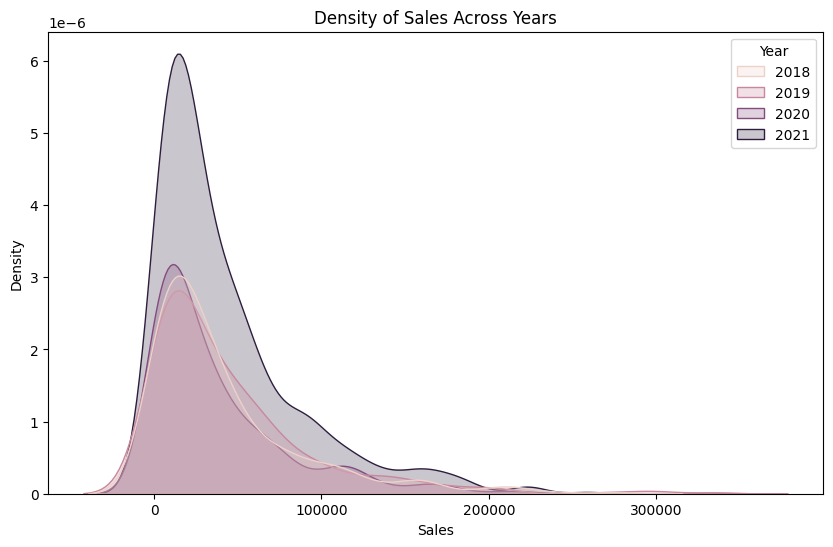

In [57]:
# Density of sales across years
plt.figure(figsize=(10,6))
sns.kdeplot(data=mobile_data, x='Sales', hue='Year', fill=True)
plt.title('Density of Sales Across Years')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

**Q11. Distribution of sales over mobile brands**

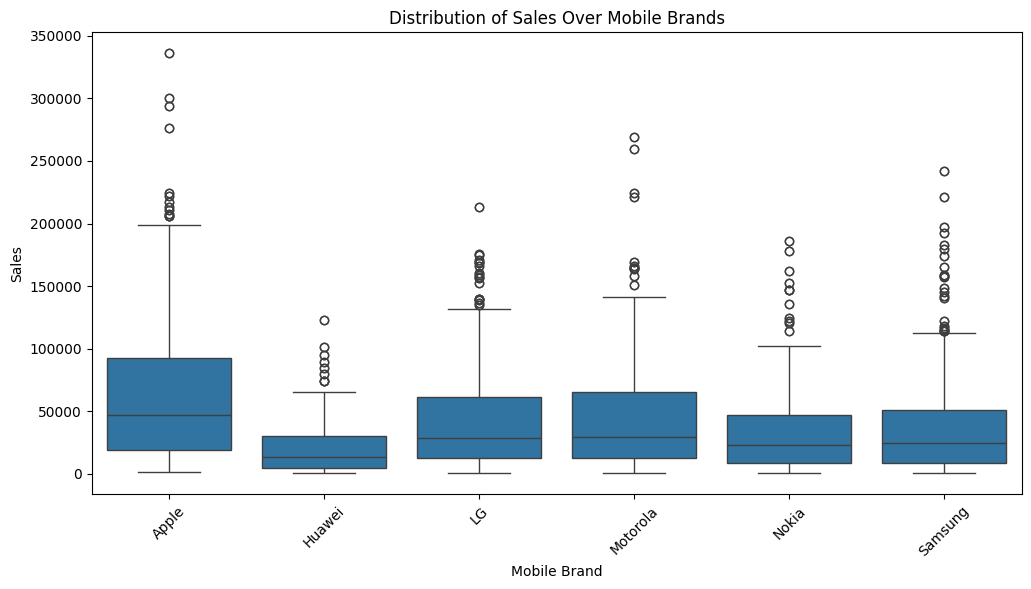

In [58]:
# Distribution of sales over mobile brands
plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Sales', data=mobile_data)
plt.title('Distribution of Sales Over Mobile Brands')
plt.xlabel('Mobile Brand')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**Q12. Find the profit margin per brand (Sales - Cost)**

In [59]:
# Profit margin per brand (Sales - Cost)
mobile_data['Profit_Margin'] = mobile_data['Unit Price'] - mobile_data['Unit Cost']
profit_margin_per_brand = mobile_data.groupby('Brand')['Profit_Margin'].mean()
print(profit_margin_per_brand)

Brand
Apple       450.0
Huawei      275.0
LG          250.0
Motorola    275.0
Nokia       285.0
Samsung     230.0
Name: Profit_Margin, dtype: float64


**Q13. Find the operator that contributes the most to profits**

In [60]:
# Operator that contributes the most to profits
# Ensure 'Profit_Margin' column exists
if 'Profit_Margin' not in mobile_data.columns:
    mobile_data['Profit_Margin'] = mobile_data['Sales'] - mobile_data['Cost']
operator_profit = mobile_data.groupby('Operator')['Profit_Margin'].sum()
max_operator = operator_profit.idxmax()
print(f"Operator contributing the most to profits: {max_operator} with total profit {operator_profit[max_operator]}")

Operator contributing the most to profits: Claro with total profit 186570


**Q14. Find any significant difference in unit cost across distributors**

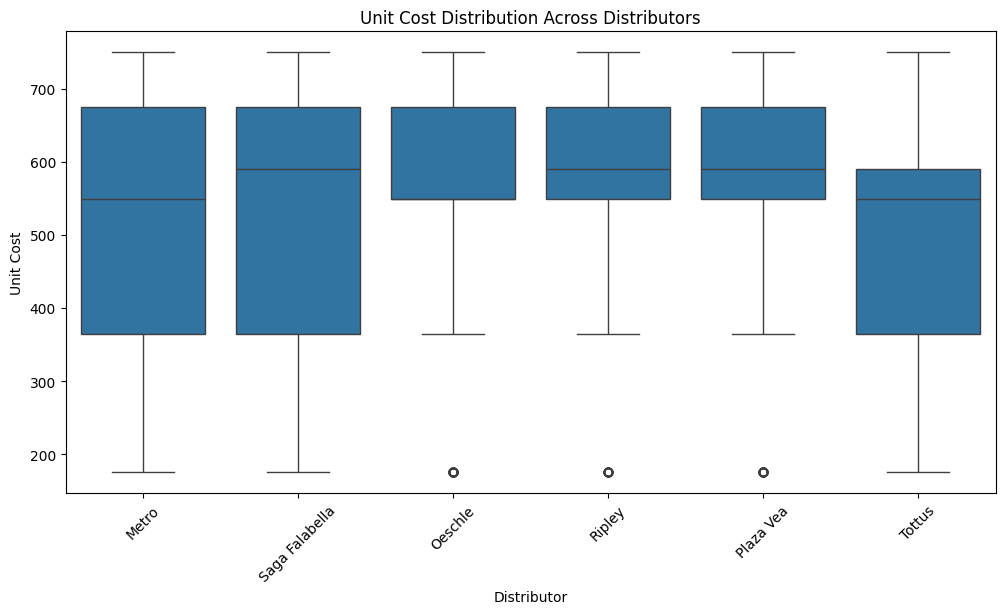

ANOVA F-statistic: 2.08870689018026
ANOVA p-value: 0.06391485501991204
There is no significant difference in unit cost across distributors.


In [61]:
# Significant difference in unit cost across distributors
import scipy.stats as stats

# Boxplot for visual inspection
plt.figure(figsize=(12,6))
sns.boxplot(x='Distributor', y='Unit Cost', data=mobile_data)
plt.title('Unit Cost Distribution Across Distributors')
plt.xlabel('Distributor')
plt.ylabel('Unit Cost')
plt.xticks(rotation=45)
plt.show()

# ANOVA test
anova_result = stats.f_oneway(*[group['Unit Cost'].values for name, group in mobile_data.groupby('Distributor')])
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)
if anova_result.pvalue < 0.05:
    print('There is a significant difference in unit cost across distributors.')
else:
    print('There is no significant difference in unit cost across distributors.')

#### **Time-based Analysis**

**Q15. Find the years of data the dataset covers**

In [62]:
# Years of data the dataset covers
years_covered = mobile_data['Year'].unique()
years_covered.sort()
print(f"The dataset covers the following years: {years_covered}")

The dataset covers the following years: [2018 2019 2020 2021]


**Q16. Find the trend of sales by quarter over the years**

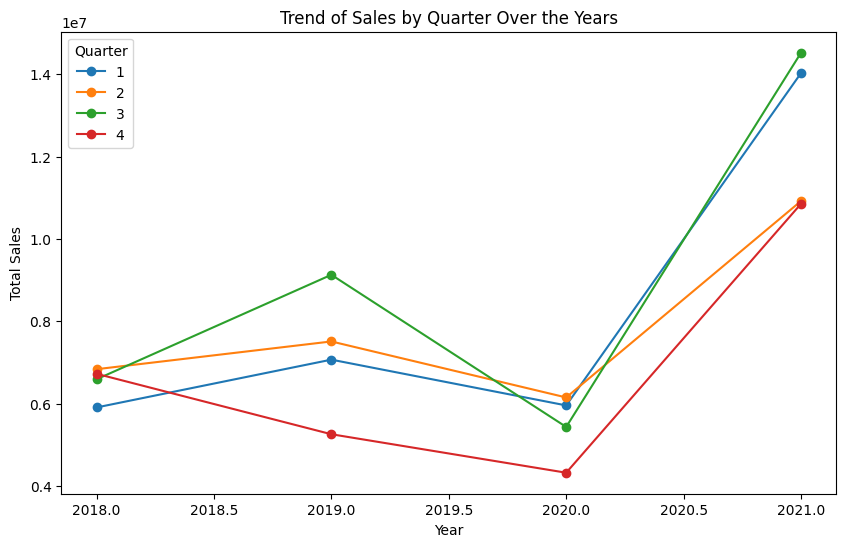

In [63]:
# Trend of sales by quarter over the years
# Use the integer 'Month' column to compute 'Quarter'
mobile_data['Quarter'] = ((mobile_data['Month'] - 1) // 3 + 1)
sales_by_quarter = mobile_data.groupby(['Year', 'Quarter'])['Sales'].sum().unstack()
sales_by_quarter.plot(marker='o', figsize=(10,6))
plt.title('Trend of Sales by Quarter Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')
plt.show()

**Q17. Find the day of the week with highest sales**

In [64]:
# Day of the week with highest sales
# Assuming there is a 'Date' column in the dataset
mobile_data['DayOfWeek'] = pd.to_datetime(mobile_data['Date'], errors='coerce').dt.day_name()
day_sales = mobile_data.groupby('DayOfWeek')['Sales'].sum()
highest_sales_day = day_sales.idxmax()
print(f"Day of the week with highest sales: {highest_sales_day} ({day_sales[highest_sales_day]})")

Day of the week with highest sales: Thursday (20707500)


/tmp/ipython-input-1553202187.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mobile_data['DayOfWeek'] = pd.to_datetime(mobile_data['Date'], errors='coerce').dt.day_name()


**Q18. Find the fluctuation of sales by week number**

/tmp/ipython-input-255468437.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mobile_data['Week_Number'] = pd.to_datetime(mobile_data['Date'], errors='coerce').dt.isocalendar().week


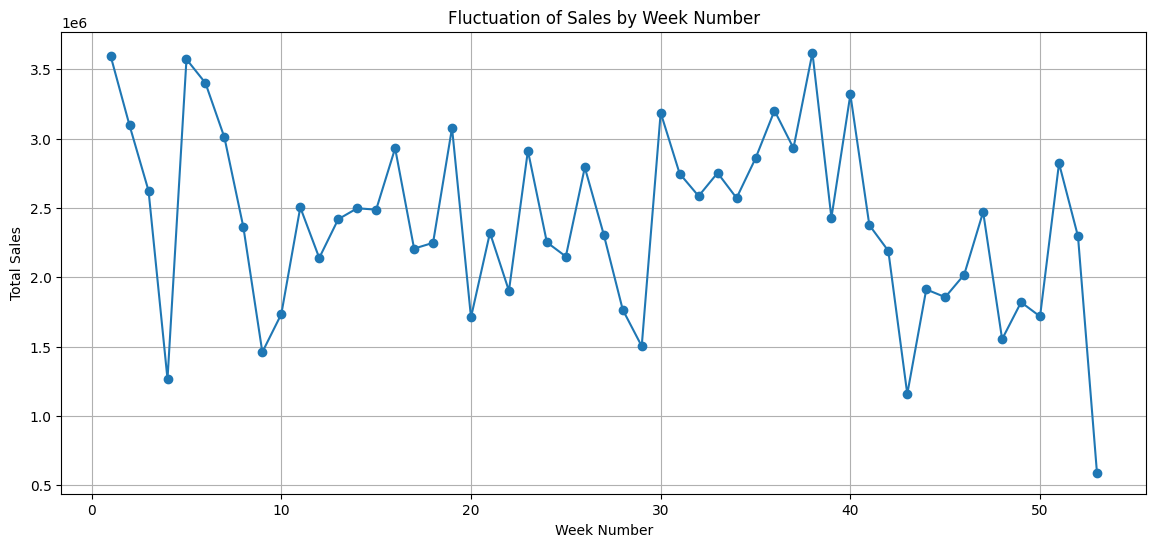

In [65]:
# Fluctuation of sales by week number
# Assuming there is a 'Date' column in the dataset
mobile_data['Week_Number'] = pd.to_datetime(mobile_data['Date'], errors='coerce').dt.isocalendar().week
weekly_sales = mobile_data.groupby('Week_Number')['Sales'].sum()
plt.figure(figsize=(14,6))
weekly_sales.plot(marker='o')
plt.title('Fluctuation of Sales by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### **Mobile Brand Analysis**

**Q19. Find the total numbers and names of the mobile brands**

In [66]:
# Total numbers and names of the mobile brands
brand_names = mobile_data['Brand'].unique()
num_brands = len(brand_names)
print(f"Total number of mobile brands: {num_brands}")
print(f"Names of the mobile brands: {brand_names}")

Total number of mobile brands: 6
Names of the mobile brands: ['Apple' 'Huawei' 'LG' 'Motorola' 'Nokia' 'Samsung']


**Q20. Find the mobile brand with maximum sales**

In [67]:
# Mobile brand with maximum sales
brand_sales = mobile_data.groupby('Brand')['Sales'].sum()
max_sales_brand = brand_sales.idxmax()
print(f"Mobile brand with maximum sales: {max_sales_brand} ({brand_sales[max_sales_brand]})")

Mobile brand with maximum sales: Apple (32136000)


**Q21. Find the mobile brand with most units sold over time**

In [68]:
# Mobile brand with most units sold over time
brand_units = mobile_data.groupby('Brand')['Amount'].sum()
max_units_brand = brand_units.idxmax()
print(f"Mobile brand with most units sold: {max_units_brand} ({brand_units[max_units_brand]})")

Mobile brand with most units sold: LG (39782)


**Q22. Find the average unit price per brand**

In [69]:
# Average unit price per brand
avg_unit_price = mobile_data.groupby('Brand')['Unit Price'].mean()
print(avg_unit_price)

Brand
Apple       1200.0
Huawei       450.0
LG           800.0
Motorola     950.0
Nokia        650.0
Samsung      820.0
Name: Unit Price, dtype: float64


#### **Synthetic Data Generation & Analysis**

**Q23. Generate 100 synthetic rows of data**

In [70]:
date_range= pd.date_range(start="2022-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2022-01-01,-0.020902
1,2022-01-02,0.096426
2,2022-01-03,1.374091
3,2022-01-04,0.782519
4,2022-01-05,1.329617
...,...,...
95,2022-04-06,10.715524
96,2022-04-07,9.121097
97,2022-04-08,8.521722
98,2022-04-09,8.526965


**Q24. Insert synthetic rows into the dataset**

In [71]:
# Insert 100 synthetic rows into the dataset
# Assuming 'df' contains the synthetic data and matches the structure of 'mobile_data'

# Example: create a synthetic DataFrame with the same columns as mobile_data
synthetic_rows = mobile_data.sample(100, replace=True).copy()

# Optionally, modify some values to make them more synthetic
synthetic_rows['Sales'] = np.random.randint(1000, 10000, size=100)
synthetic_rows['Units Sold'] = np.random.randint(1, 100, size=100)
synthetic_rows['Date'] = pd.date_range(start="2025-01-01", periods=100, freq="D")

# Append synthetic rows to the original dataset
mobile_data = pd.concat([mobile_data, synthetic_rows], ignore_index=True)
print(f"New dataset shape: {mobile_data.shape}")

New dataset shape: (3098, 22)


**Q25.Re-run the analysis on the combined dataset**

Combined dataset shape: (3098, 22)


,Unit Cost,Amount,Unit Price,Sales,Year,Quarter,Month,Week Day,Week Number,Profit_Margin,Week_Number,Units Sold
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.0,100.000000
mean,540.526146,50.820529,829.528728,41237.106843,2019.761782,2.514848,6.566495,4.132343,27.050355,289.002582,26.767269,45.670000
std,170.140156,52.207202,212.015797,45951.351922,1.169270,1.105044,3.424296,1.953920,15.003090,73.985481,15.006738,28.724767
min,175.000000,1.000000,450.000000,450.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,230.000000,1.0,1.000000
25%,550.000000,14.000000,800.000000,9525.000000,2019.000000,2.000000,4.000000,2.000000,14.000000,250.000000,14.0,21.000000
50%,590.000000,33.000000,820.000000,24750.000000,2020.000000,3.000000,7.000000,4.000000,27.000000,275.000000,27.0,41.000000
75%,675.000000,70.000000,950.000000,56000.000000,2021.000000,3.000000,9.000000,6.000000,40.000000,285.000000,39.0,69.250000
max,750.000000,295.000000,1200.000000,336000.000000,2021.000000,4.000000,12.000000,7.000000,53.000000,450.000000,53.0,99.000000


Missing values per column:
Units Sold    2998
dtype: int64
Total sales by year:
Year
2018    26175286
2019    29084301
2020    21970625
2021    50522345
Name: Sales, dtype: int64
Maximum sales by month:
Month
1     276000
2     268850
3     206400
4     241900
5     221350
6     206400
7     300000
8     259350
9     336000
10    224400
11    185900
12    179580
Name: Sales, dtype: int64
Average unit price per brand:
Brand
Apple       1200.0
Huawei       450.0
LG           800.0
Motorola     950.0
Nokia        650.0
Samsung      820.0
Name: Unit Price, dtype: float64
Mobile brand with most units sold: LG (40796)


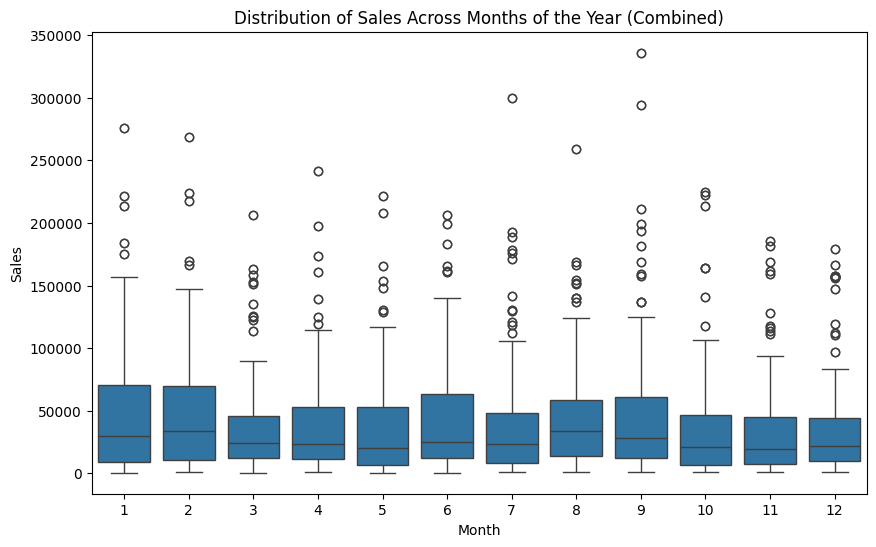

In [72]:
# Re-run the main analyses on the combined dataset
# 1. Show new shape
print(f"Combined dataset shape: {mobile_data.shape}")

# 2. Basic statistics
display(mobile_data.describe())

# 3. Number of missing values
missing_values = mobile_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else 'No missing values')

# 4. Total sales by year
total_sales_by_year = mobile_data.groupby('Year')['Sales'].sum()
print("Total sales by year:")
print(total_sales_by_year)

# 5. Maximum sales by month
max_sales_by_month = mobile_data.groupby('Month')['Sales'].max()
print("Maximum sales by month:")
print(max_sales_by_month)

# 6. Average unit price per brand
avg_unit_price = mobile_data.groupby('Brand')['Unit Price'].mean()
print("Average unit price per brand:")
print(avg_unit_price)

# 7. Brand with most units sold
brand_units = mobile_data.groupby('Brand')['Amount'].sum()
max_units_brand = brand_units.idxmax()
print(f"Mobile brand with most units sold: {max_units_brand} ({brand_units[max_units_brand]})")

# 8. Plot: Distribution of sales across months
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='Sales', data=mobile_data)
plt.title('Distribution of Sales Across Months of the Year (Combined)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Q26. Compare sales by brand before vs. after adding synthetic data**

Sales by brand: Original vs. Combined Data


,Original Sales,Combined Sales
Brand,,
Apple,32136000,32252433
Huawei,7204500,7301949
LG,31825600,31909898
Motorola,17385000,17436793
Nokia,13586300,13677627
Samsung,25067400,25173857


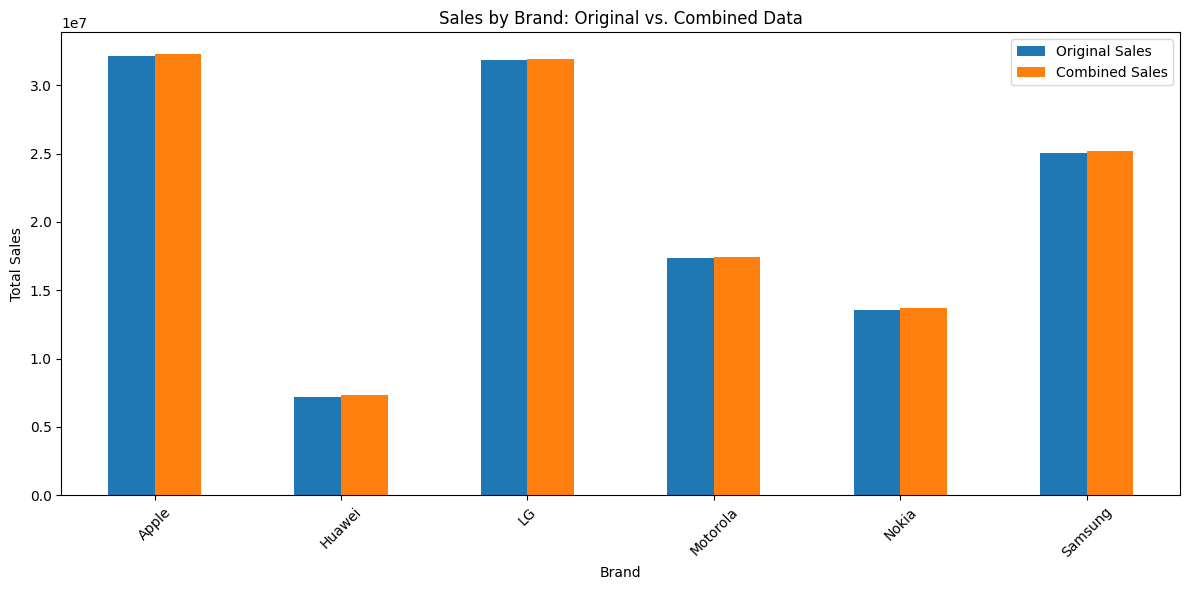

In [73]:
# Compare sales by brand: Original data vs. Combined (Original + Synthetic) data
original_data_rows = mobile_data.shape[0] - 100  # 100 synthetic rows were added

# Split the combined dataset into original and synthetic parts
original_data = mobile_data.iloc[:original_data_rows]
combined_data = mobile_data  # already includes both original and synthetic

# Calculate total sales by brand for both datasets
sales_by_brand_original = original_data.groupby('Brand')['Sales'].sum()
sales_by_brand_combined = combined_data.groupby('Brand')['Sales'].sum()

# Combine into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original Sales': sales_by_brand_original,
    'Combined Sales': sales_by_brand_combined
}).fillna(0)

print("Sales by brand: Original vs. Combined Data")
display(comparison_df)

# Plot comparison
comparison_df.plot(kind='bar', figsize=(12,6))
plt.title('Sales by Brand: Original vs. Combined Data')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Q27. Compare sales distribution before vs. after adding synthetic data**

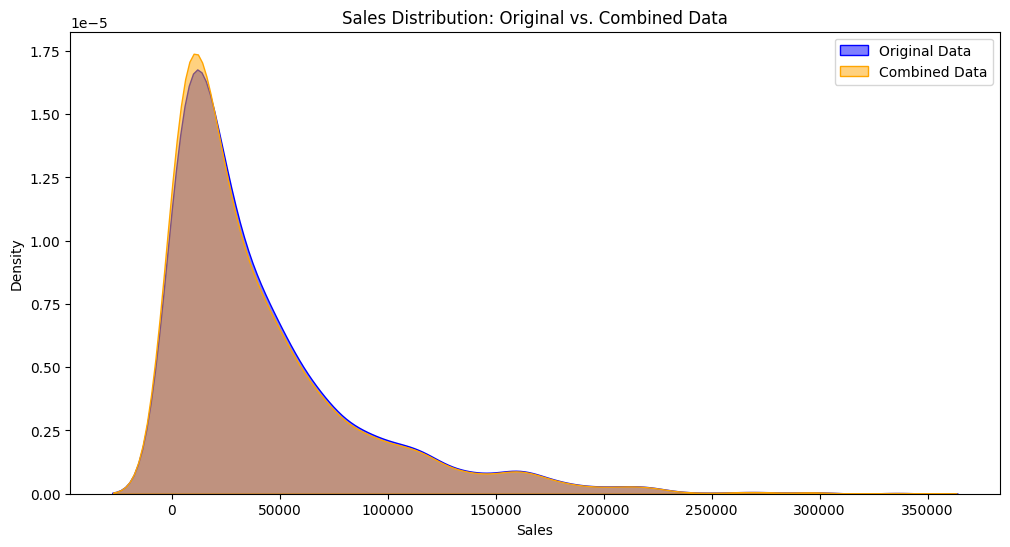

Original - Mean: 42429.89, Median: 26000.00, Std: 46234.74
Combined - Mean: 41237.11, Median: 24750.00, Std: 45951.35


In [74]:
# Compare sales distribution before vs. after adding synthetic data
original_data_rows = mobile_data.shape[0] - 100  # 100 synthetic rows were added
original_data = mobile_data.iloc[:original_data_rows]
combined_data = mobile_data

plt.figure(figsize=(12,6))
sns.kdeplot(original_data['Sales'], label='Original Data', fill=True, color='blue', alpha=0.5)
sns.kdeplot(combined_data['Sales'], label='Combined Data', fill=True, color='orange', alpha=0.5)
plt.title('Sales Distribution: Original vs. Combined Data')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

# Optionally, show summary statistics for both
def print_stats(label, data):
    print(f"{label} - Mean: {data.mean():.2f}, Median: {data.median():.2f}, Std: {data.std():.2f}")
print_stats('Original', original_data['Sales'])
print_stats('Combined', combined_data['Sales'])